# PD-L1 expression in invasive urothelial carcinoma: A single institution experience
S. Canete-Portillo, M. Rodriguez Pena, A. Chaux, A. Basu, L. Nandagopal, G. Netto, C. Magi-Galluzzi

## Background
Programmed death-ligand 1 (PD-L1) is a co-inhibitory molecule that impairs the T-cell response by down-regulating T-cell proliferation and cytokine production. Tumor cells often up-regulate PD-L1, evading the host immune system. Immune checkpoint inhibitors are emerging as a front-line treatment for several types of cancer. The aim of this study was to evaluate PD-L1 expression in conventional urothelial carcinoma (UCNOS) and UC with variant histology (UCV), with particular emphasis on squamous differentiation (SqD).

## Material and methods
We conducted a retrospective search of our surgical pathology database for patients with PD-L1 performed on invasive UC (primary or metastatic) from 2017 to October 2020. Patients’ clinicopathological data and PD-L1 results were collected. Monoclonal mouse anti-PD-L1, clone 22C3, was used in all cases to detect PD-L1 protein (FDA-approved test); PD-L1 Combined Positive Score (CPS) was recorded and interpreted as expressed (CPS ≥10) or no expression (CPS <10).

## Results

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import scipy.stats
from lifelines import KaplanMeierFitter
from lifelines.statistics import multivariate_logrank_test
from matplotlib import pyplot as plt
import seaborn as sns

# Setting plot features
sns.set(font_scale=1.25, rc={'figure.figsize':[12,8]})
sns.set_style('dark')

# Importing dataset
df = pd.read_pickle('PDL1_GU_DATA.pkl')

# Exclusing the 3 noninvasive cases
df.query('subtype != "UC, non-invasive"', inplace=True)

In [2]:
# Number of patients included
df.shape[0]

45

### Clinicopathologic features

,count,mean,std,min,25%,50%,75%,max
age,45,69,9,47,63,70,78,84


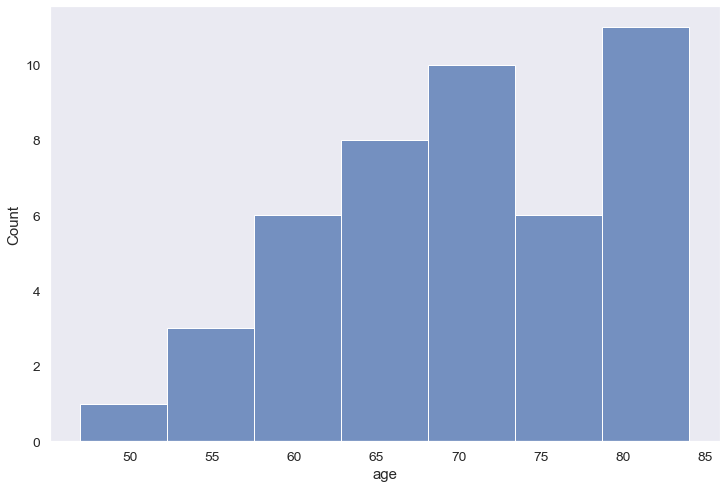

In [3]:
# Age
display(df['age'].describe().to_frame().astype('int').transpose())
sns.histplot(x='age', data=df)
plt.show()

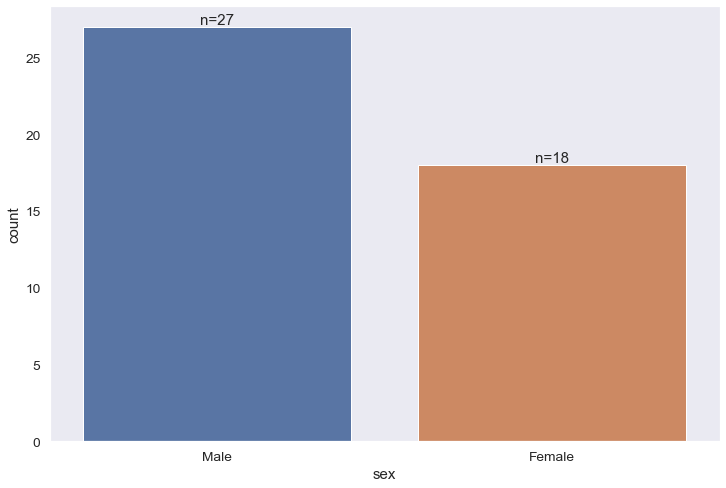

In [4]:
# Sex
x = 'sex'
nums = df[x].value_counts()
sns.countplot(x=x, data=df)
for i in range(len(nums)):
    plt.annotate(text='n=' + str(nums[i]), xy=(i, nums[i]), va='bottom', ha='center')
plt.show()

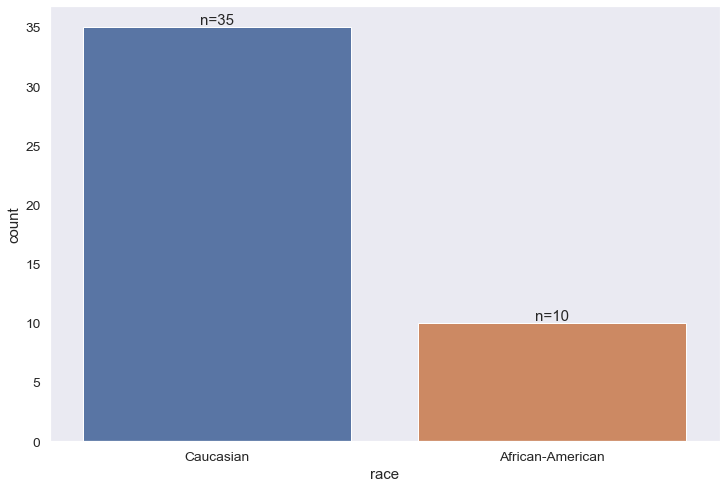

In [5]:
# Race
x = 'race'
nums = df[x].value_counts()
sns.countplot(x=x, data=df)
for i in range(len(nums)):
    plt.annotate(text='n=' + str(nums[i]), xy=(i, nums[i]), va='bottom', ha='center')
plt.show()

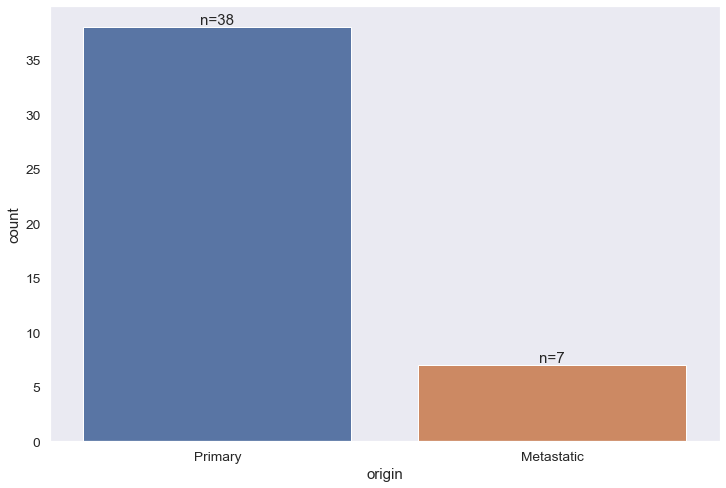

In [6]:
# Tumor origin
x = 'origin'
nums = df[x].value_counts()
sns.countplot(x=x, data=df)
for i in range(len(nums)):
    plt.annotate(text='n=' + str(nums[i]), xy=(i, nums[i]), va='bottom', ha='center')
plt.show()

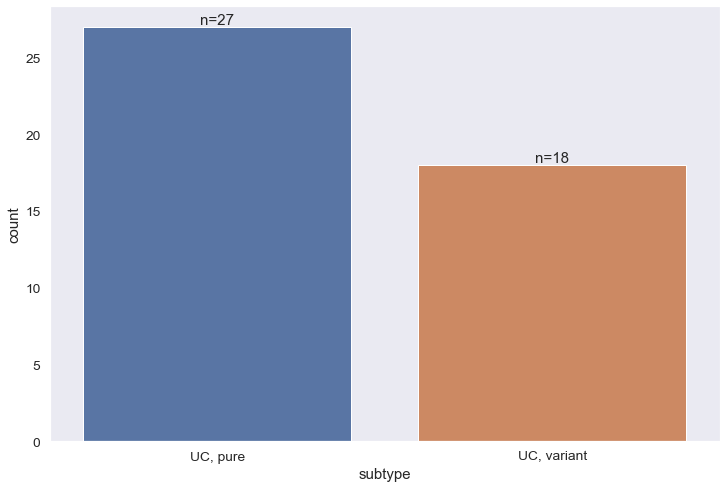

In [7]:
# Histologic subtype
x = 'subtype'
nums = df[x].value_counts()
sns.countplot(x=x, data=df)
for i in range(len(nums)):
    plt.annotate(text='n=' + str(nums[i]), xy=(i, nums[i]), va='bottom', ha='center')
plt.show()

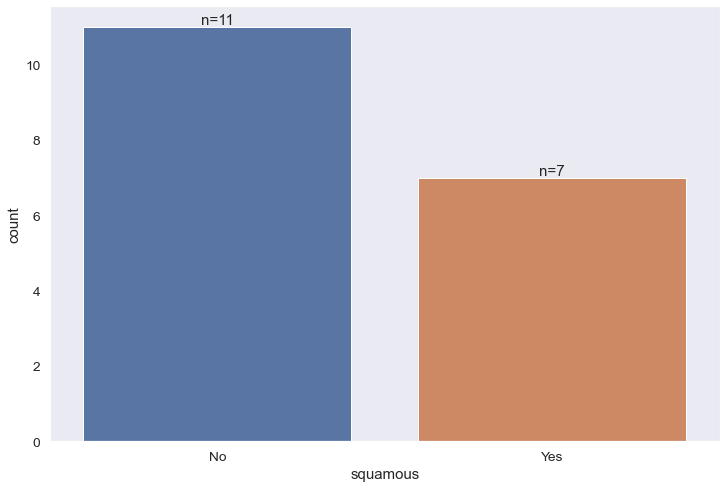

In [8]:
# Squamous differentiation
x = 'squamous'
nums = df[x].value_counts()
sns.countplot(x=x, data=df)
for i in range(len(nums)):
    plt.annotate(text='n=' + str(nums[i]), xy=(i, nums[i]), va='bottom', ha='center')
plt.show()

### Conventional vs variant histology

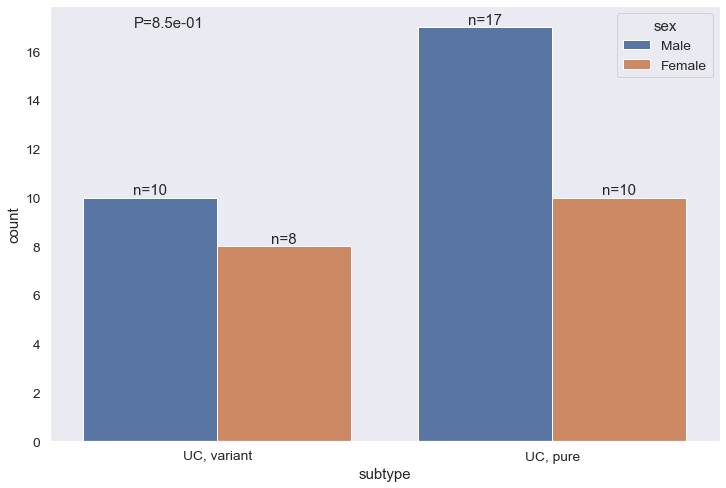

In [9]:
x = 'sex'
tbl = pd.crosstab(df['subtype'], df[x])
nums = np.array(tbl).ravel()
p = scipy.stats.chi2_contingency(tbl)[1]
ax = sns.countplot(x='subtype', hue=x, data=df, order=['UC, variant','UC, pure'])
for i, v in zip(range(len(nums)), ax.patches):
    plt.annotate(text='n='+str(nums[i]), xy=(v.get_x()+.20, nums[i]), ha='center', va='bottom')
plt.annotate(text='P={:.1e}'.format(p), xy=(-.25, np.array(nums).max()))
plt.show()

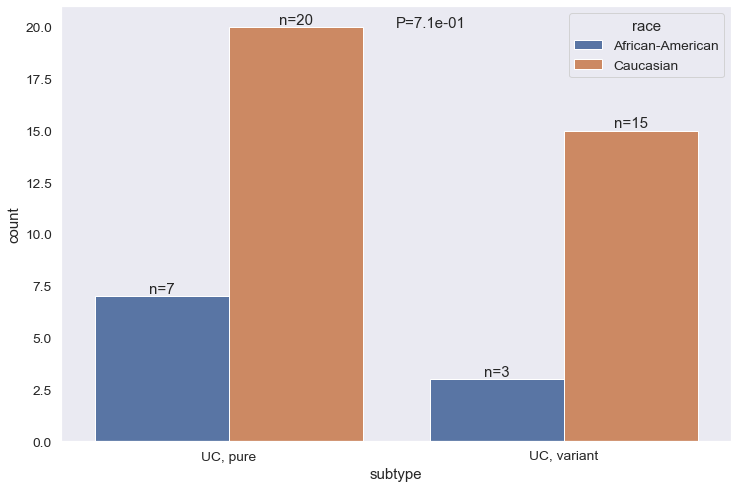

In [10]:
x = 'race'
tbl = pd.crosstab(df[x], df['subtype'])
nums = np.array(tbl).ravel()
p = scipy.stats.chi2_contingency(tbl)[1]
ax = sns.countplot(x='subtype', hue=x, data=df, hue_order=['African-American','Caucasian'])
for i, v in zip(range(len(nums)), ax.patches):
    plt.annotate(text='n='+str(nums[i]), xy=(v.get_x()+.20, nums[i]), ha='center', va='bottom')
plt.annotate(text='P={:.1e}'.format(p), xy=(0.5, np.array(nums).max()))
plt.show()

,count,mean,std,min,25%,50%,75%,max
subtype,,,,,,,,
"UC, pure",27,69,8,47,64,70,75,83
"UC, variant",18,70,9,55,63,71,80,84


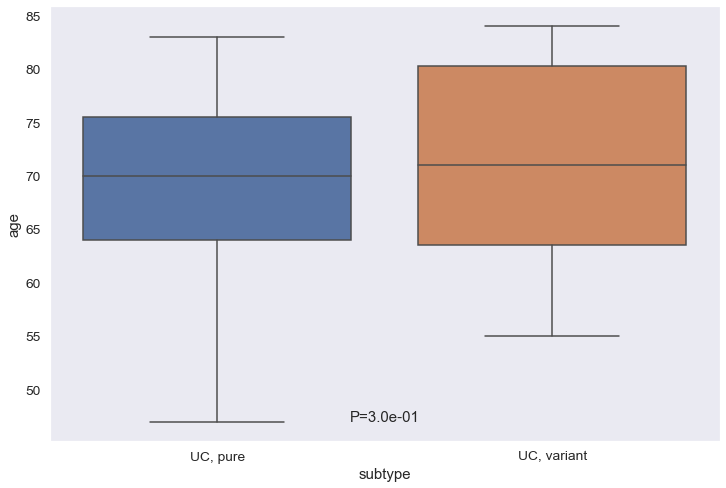

In [11]:
x = 'age'
display(df.groupby('subtype')[x].describe().astype('int'))
p = scipy.stats.mannwhitneyu(*[data[x].values for name, data in df.groupby('subtype')])[1]
sns.boxplot(x='subtype', y=x, data=df)
plt.annotate(text='P={:.1e}'.format(p), xy=(0.5, np.array(df[x]).min()), ha='center')
plt.show()

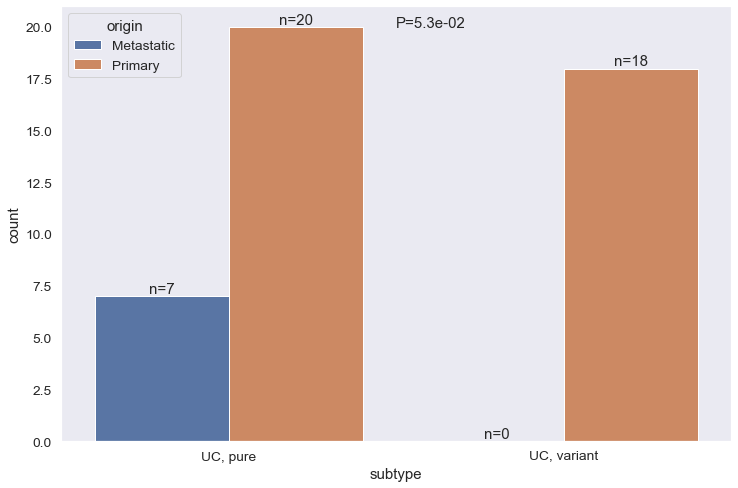

In [12]:
x = 'origin'
tbl = pd.crosstab(df[x], df['subtype'])
nums = np.array(tbl).ravel()
p = scipy.stats.chi2_contingency(tbl)[1]
ax = sns.countplot(x='subtype', hue=x, data=df, hue_order=['Metastatic','Primary'])
for i, v in zip(range(len(nums)), ax.patches):
    plt.annotate(text='n='+str(nums[i]), xy=(v.get_x()+.20, nums[i]), ha='center', va='bottom')
plt.annotate(text='P={:.1e}'.format(p), xy=(0.5, np.array(nums).max()))
plt.show()

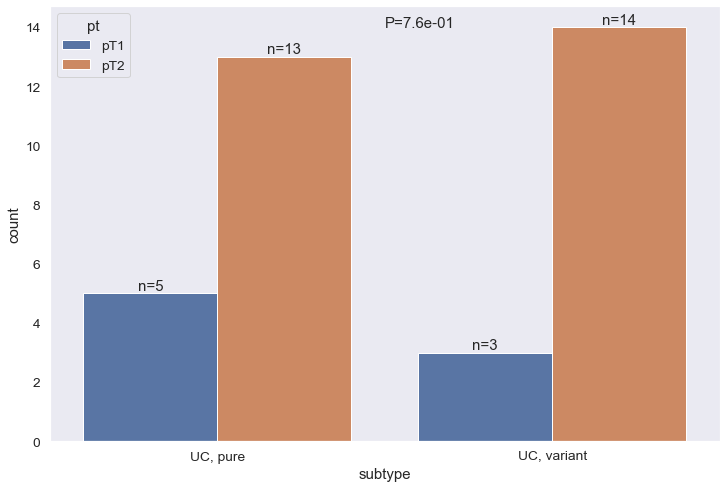

In [13]:
x = 'pt'
tbl = pd.crosstab(df[x], df['subtype'])
nums = np.array(tbl).ravel()
p = scipy.stats.chi2_contingency(tbl)[1]
ax = sns.countplot(x='subtype', hue=x, data=df, hue_order=['pT1','pT2'])
for i, v in zip(range(len(nums)), ax.patches):
    plt.annotate(text='n='+str(nums[i]), xy=(v.get_x()+.20, nums[i]), ha='center', va='bottom')
plt.annotate(text='P={:.1e}'.format(p), xy=(0.5, np.array(nums).max()))
plt.show()

,count,mean,std,min,25%,50%,75%,max
subtype,,,,,,,,
"UC, pure",27,20,27,0,3,10,20,95
"UC, variant",18,42,40,3,10,22,87,100


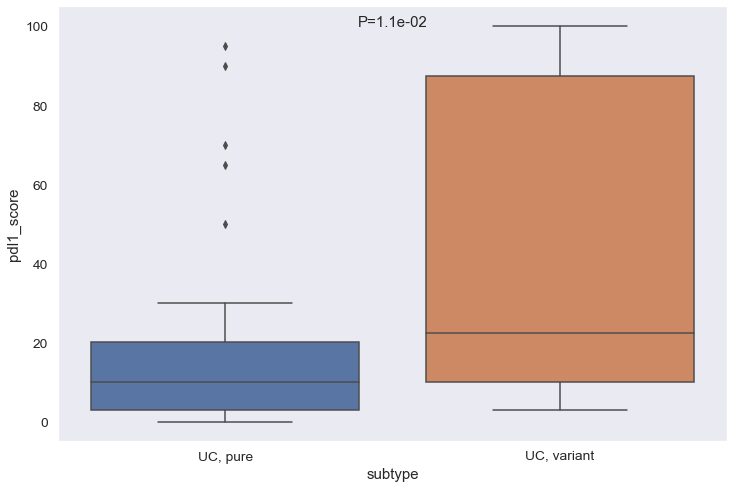

In [14]:
x = 'pdl1_score'
display(df.groupby('subtype')[x].describe().astype('int'))
p = scipy.stats.mannwhitneyu(*[data[x].values for name, data in df.groupby('subtype')])[1]
sns.boxplot(x='subtype', y=x, data=df)
plt.annotate(text='P={:.1e}'.format(p), xy=(0.5, np.array(df[x]).max()), ha='center')
plt.show()

### Pathologic features in primary tumors

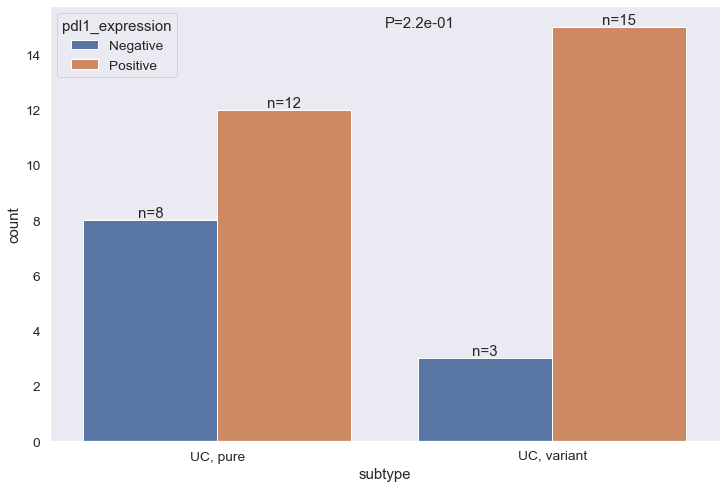

In [15]:
df.query('origin=="Primary"', inplace=True)
x = 'pdl1_expression'
tbl = pd.crosstab(df[x], df['subtype'])
nums = np.array(tbl).ravel()
p = scipy.stats.chi2_contingency(tbl)[1]
ax = sns.countplot(x='subtype', hue=x, data=df, hue_order=['Negative','Positive'])
for i, v in zip(range(len(nums)), ax.patches):
    plt.annotate(text='n='+str(nums[i]), xy=(v.get_x()+.20, nums[i]), ha='center', va='bottom')
plt.annotate(text='P={:.1e}'.format(p), xy=(0.5, np.array(nums).max()))
plt.show()

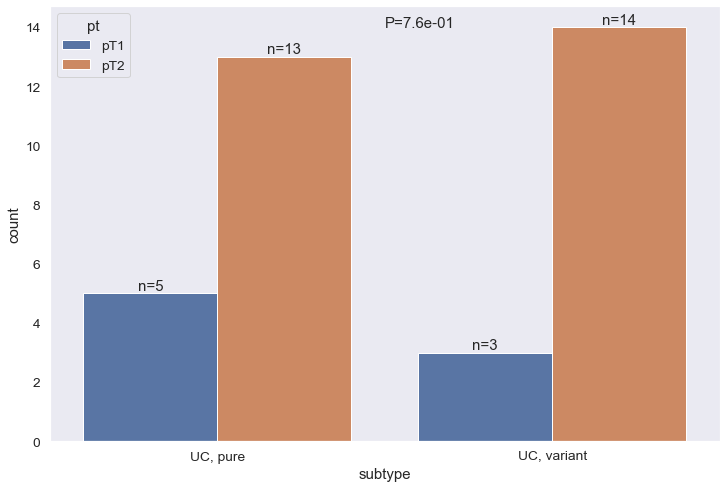

In [16]:
x = 'pt'
tbl = pd.crosstab(df[x], df['subtype'])
nums = np.array(tbl).ravel()
p = scipy.stats.chi2_contingency(tbl)[1]
ax = sns.countplot(x='subtype', hue=x, data=df, hue_order=['pT1','pT2'])
for i, v in zip(range(len(nums)), ax.patches):
    plt.annotate(text='n='+str(nums[i]), xy=(v.get_x()+.20, nums[i]), ha='center', va='bottom')
plt.annotate(text='P={:.1e}'.format(p), xy=(0.5, np.array(nums).max()))
plt.show()

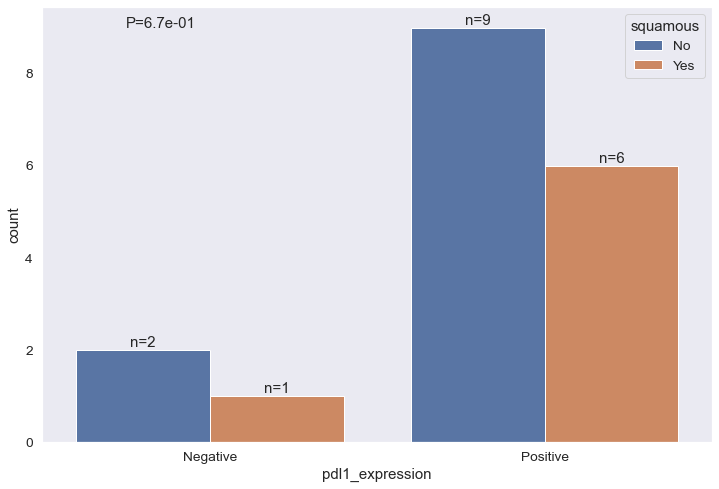

In [17]:
x = 'squamous'
tbl = pd.crosstab(df[x], df['pdl1_expression'])
nums = np.array(tbl).ravel()
p = scipy.stats.chi2_contingency(tbl)[1]
ax = sns.countplot(x='pdl1_expression', hue=x, data=df, hue_order=['No','Yes'])
for i, v in zip(range(len(nums)), ax.patches):
    plt.annotate(text='n='+str(nums[i]), xy=(v.get_x()+.20, nums[i]), ha='center', va='bottom')
plt.annotate(text='P={:.1e}'.format(p), xy=(-.25, np.array(nums).max()))
plt.show()

### Survival analysis (primary tumors)

In [18]:
df['mortality_overall'].replace({'AWD + NED':0,'DOD + DOC':1}, inplace=True)
df['mortality_cancer'].replace({'AWD + NED + DOC':0,'DOD':1}, inplace=True)

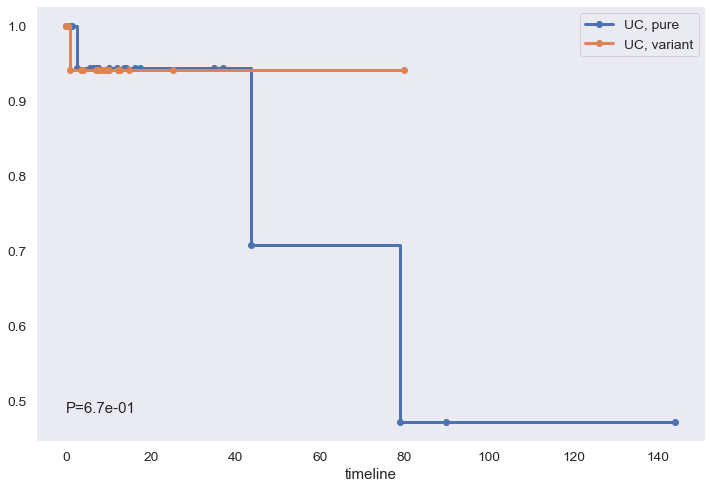

In [19]:
# Overall mortality
kmf = KaplanMeierFitter()
p = multivariate_logrank_test(df['fu_months'], df['subtype'], df['mortality_overall']).p_value
for name, data in df.groupby('subtype'):
    kmf.fit(data['fu_months'], data['mortality_overall'], label=name)
    kmf.plot(ci_show=False, marker='o', linewidth=3)
plt.annotate(text='P={:.1e}'.format(p), xy=(0,0.5), va='top')
plt.show()

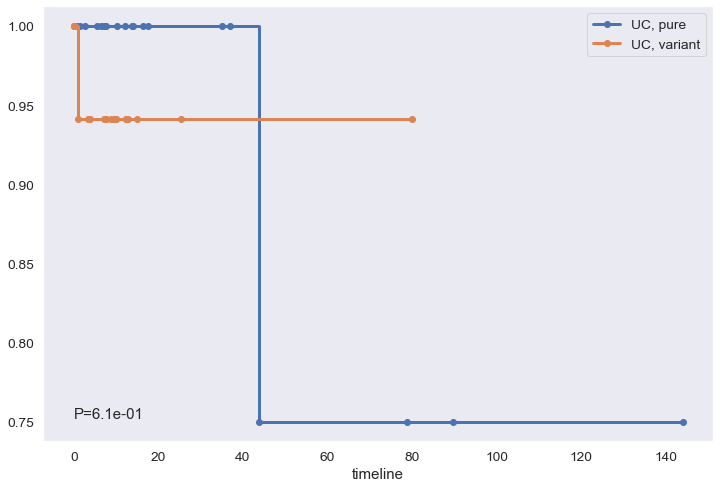

In [20]:
# Cancer-related mortality
kmf = KaplanMeierFitter()
p = multivariate_logrank_test(df['fu_months'], df['subtype'], df['mortality_cancer']).p_value
for name, data in df.groupby('subtype'):
    kmf.fit(data['fu_months'], data['mortality_cancer'], label=name)
    kmf.plot(ci_show=False, marker='o', linewidth=3)
plt.annotate(text='P={:.1e}'.format(p), xy=(0,0.75), va='bottom')
plt.show()